In [1]:
import tangram as tg

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adata = sc.read_visium('/Users/yfy6677/OneDrive - Northwestern University/Northwestern/Yi Lab/Manuscript/Code_2ndDraft/Mouse Hippocampus/Visium/',  count_file='filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [4]:
adata


AnnData object with n_obs × n_vars = 2264 × 19465
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

<AxesSubplot:xlabel='n_genes_by_counts'>

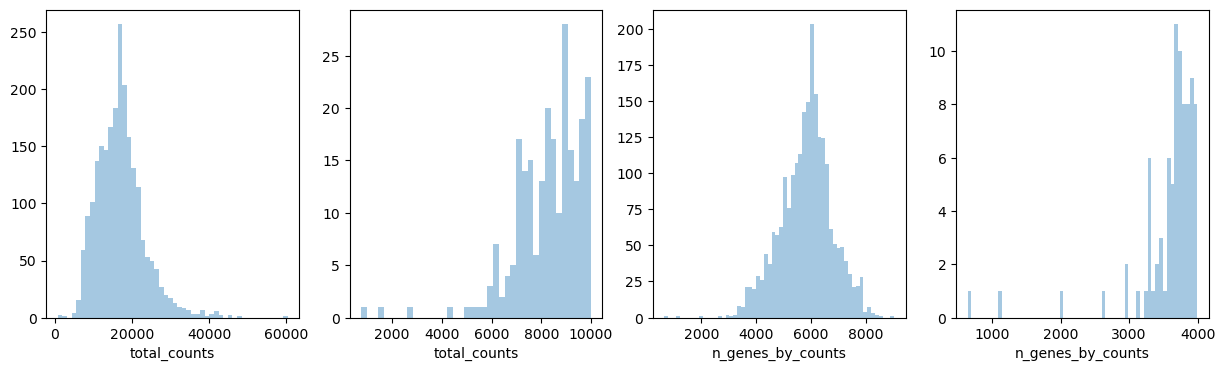

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [6]:
#sc.pp.filter_cells(adata, min_counts=5000)
#sc.pp.filter_cells(adata, max_counts=35000)
#adata = adata[adata.obs["pct_counts_mt"] < 20]
#print(f"#cells after MT filter: {adata.n_obs}")
#sc.pp.filter_genes(adata, min_cells=10)

In [7]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [10]:
import anndata as ad

ad_sc=ad.read_loom("/Users/yfy6677/OneDrive - Northwestern University/Northwestern/Yi Lab/Manuscript/Code_2ndDraft/Mouse Hippocampus/simulate_vizgen/vizgen.hippo.loom")

In [11]:
ad_sc

AnnData object with n_obs × n_vars = 8000 × 1930
    obs: 'SCT_snn_res.0.3', 'nCount_SCT', 'nCount_Vizgen', 'nFeature_SCT', 'nFeature_Vizgen', 'orig.ident', 'predicted.id', 'prediction.score.Astrocyte', 'prediction.score.CA1.Principal.cells', 'prediction.score.CA2.Principal.cells', 'prediction.score.CA3.Principal.cells', 'prediction.score.Dentate.Principal.cells', 'prediction.score.Dentate.hilum', 'prediction.score.Endothelial.stalk', 'prediction.score.Endothelial.tip', 'prediction.score.Entorhinal.cortex', 'prediction.score.Ependymal', 'prediction.score.Interneuron', 'prediction.score.Microglia', 'prediction.score.Mural', 'prediction.score.Neurogenesis..SGZ.', 'prediction.score.Oligodendrocyte', 'prediction.score.Polydendrocyte_1', 'prediction.score.Polydendrocyte_2', 'prediction.score.Resident.macrophage', 'prediction.score.Subiculum', 'prediction.score.max', 'seurat_clusters'
    layers: 'counts', 'scale.data'

In [12]:
tg.pp_adatas(ad_sc, adata, genes=None)

INFO:root:1685 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:1685 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [13]:
ad_map = tg.map_cells_to_space(ad_sc, adata)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1685 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.532, KL reg: 0.002
Score: 0.697, KL reg: 0.000
Score: 0.702, KL reg: 0.000
Score: 0.703, KL reg: 0.000
Score: 0.704, KL reg: 0.000
Score: 0.704, KL reg: 0.000
Score: 0.704, KL reg: 0.000
Score: 0.705, KL reg: 0.000
Score: 0.705, KL reg: 0.000
Score: 0.705, KL reg: 0.000


INFO:root:Saving results..


In [ ]:
ad_map.X.shape

In [20]:
ad_map.obs

,SCT_snn_res.0.3,nCount_SCT,nCount_Vizgen,nFeature_SCT,nFeature_Vizgen,orig.ident,predicted.id,prediction.score.Astrocyte,prediction.score.CA1.Principal.cells,prediction.score.CA2.Principal.cells,...,prediction.score.Microglia,prediction.score.Mural,prediction.score.Neurogenesis..SGZ.,prediction.score.Oligodendrocyte,prediction.score.Polydendrocyte_1,prediction.score.Polydendrocyte_2,prediction.score.Resident.macrophage,prediction.score.Subiculum,prediction.score.max,seurat_clusters
CellID,,,,,,,,,,,,,,,,,,,,,
297736695330031048252336181220763456676,6,737.0,381.0,250,80,1,Entorhinal cortex,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,6
179069909273112516547237570114388686779,2,903.0,955.0,267,129,1,Subiculum,0.000000,0.240487,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.759513,0.759513,2
287541292569914575702801424935333300915,19,1276.0,114.0,563,55,1,Ependymal,0.288523,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.711477,19
76255239576725000805473255176418322927,19,1103.0,347.0,322,83,1,Ependymal,0.203921,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.796079,19
25287225154638593268873825471695067308,12,752.0,62.0,252,33,1,Dentate Principal cells,0.000000,0.046100,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006669,0.947232,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266920363014190139737604129275676843676,1,1044.0,209.0,318,72,1,Astrocyte,1.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1
12296440113836942336841359828537037940,2,799.0,338.0,303,83,1,Subiculum,0.000000,0.080240,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454579,0.454579,2
110668595519253383861697666128902077796,5,1005.0,287.0,244,75,1,CA1 Principal cells,0.000000,0.618522,0.0225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251348,0.618522,5


In [27]:
adata.var_names

Index(['xkr4', 'rp1', 'sox17', 'lypla1', 'tcea1', 'rgs20', 'atp6v1h', 'oprk1',
       'npbwr1', 'rb1cc1',
       ...
       'hccs', 'mid1', 'asmt', 'uba1y', 'kdm5d', 'eif2s3y', 'uty', 'ddx3y',
       'gm4064', 'gm3376'],
      dtype='object', length=16876)

In [28]:
ad_sc.var_names

Index(['plp1', 'ptgds', 'apoe', 'cst3', 'acta2', 'apod', 'rgs5', 'vip',
       'ly6c1', 'mt1',
       ...
       'fbxo32', 'fezf2', 'mif4gd', 'pigz', 'neto1', 'pcsk2', 'ddrgk1',
       'eef1a1', 'il11ra1', 'kctd12b'],
      dtype='object', length=1843)

In [29]:
adata.obs_names

Index(['AAACAGAGCGACTCCT-1', 'AAACCCGAACGAAATC-1', 'AAACCGGGTAGGTACC-1',
       'AAACCGTTCGTCCAGG-1', 'AAACGAAGAACATACC-1', 'AAACGAGACGGTTGAT-1',
       'AAACGTGTTCGCCCTA-1', 'AAACTAACGTGGCGAC-1', 'AAACTCGTGATATAAG-1',
       'AAACTGCTGGCTCCAA-1',
       ...
       'TTGTCGTTCAGTTACC-1', 'TTGTGGCCCTGACAGT-1', 'TTGTGGTAGGAGGGAT-1',
       'TTGTGGTATAGGTATG-1', 'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1',
       'TTGTTCAGTGTGCTAC-1', 'TTGTTGTGTGTCAAGA-1', 'TTGTTTCACATCCAGG-1',
       'TTGTTTCCATACAACT-1'],
      dtype='object', length=2264)

In [ ]:
max(ad_map.X[0,:])

In [ ]:
import numpy as np

np.savetxt("Desktop/Tangram.rslt.txt",ad_map.X,delimiter=",")